# Feature Engineering

**Weather_main and Weather description**  

We decided to transform the weather_main into one-hot encoded variables, and to drop the weather_description as We see that it adds kind of redundant information with weather_main.

In [36]:
df_3 = df_2.copy()
df_3.drop(columns=['weather_description'], inplace=True)
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   holiday         61 non-null     object 
 1   temp            48204 non-null  float64
 2   rain_1h         48204 non-null  float64
 3   snow_1h         48204 non-null  float64
 4   clouds_all      48204 non-null  int64  
 5   weather_main    48204 non-null  object 
 6   traffic_volume  48204 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 3.9+ MB


In [37]:
df_3 = pd.get_dummies(df_3, columns=['weather_main'], prefix='weather')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               61 non-null     object 
 1   temp                  48204 non-null  float64
 2   rain_1h               48204 non-null  float64
 3   snow_1h               48204 non-null  float64
 4   clouds_all            48204 non-null  int64  
 5   traffic_volume        48204 non-null  int64  
 6   weather_Clear         48204 non-null  bool   
 7   weather_Clouds        48204 non-null  bool   
 8   weather_Drizzle       48204 non-null  bool   
 9   weather_Fog           48204 non-null  bool   
 10  weather_Haze          48204 non-null  bool   
 11  weather_Mist          48204 non-null  bool   
 12  weather_Rain          48204 non-null  bool   
 13  weather_Smoke         48204 non-null  bool   
 14  weather_Snow          48204 non-nul

### Holidays and Weekends

I think the valuable information to capture is wether the day is a holiday or a weekend. We don't need to keep track which holiday. So, we will create a new feature is_holiday and drop the old feature holiday. We don't need to keep track which weekend it is. So, we will create a new feature is_weekend.

In [38]:
df_4 = df_3.copy()
df_4['is_holiday'] = df_4.pop('holiday').apply(lambda x: 1 if x != 'None' else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  bool   
 6   weather_Clouds        48204 non-null  bool   
 7   weather_Drizzle       48204 non-null  bool   
 8   weather_Fog           48204 non-null  bool   
 9   weather_Haze          48204 non-null  bool   
 10  weather_Mist          48204 non-null  bool   
 11  weather_Rain          48204 non-null  bool   
 12  weather_Smoke         48204 non-null  bool   
 13  weather_Snow          48204 non-null  bool   
 14  weather_Squall        48204 non-nul

In [39]:
# Check sample values that are expected NOT TO BE a holiday
df_4[df_4.is_holiday == 0].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,


In [40]:
# Check sample values that are expected TO BE a holiday
df_4[df_4.is_holiday == 1].head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,weather_Mist,weather_Rain,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday
date_time,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,False,True,False,False,False,False,False,False,False,False,False,1
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,False,True,False,False,False,False,False,False,False,False,False,1


In [41]:
df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)

Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       ...
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype='int64', name='date_time', length=48204)

In [42]:
df_4['is_weekend'] = df_4.index.day_name().map(lambda x: 1 if x in ['Saturday','Sunday'] else 0)
df_4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp                  48204 non-null  float64
 1   rain_1h               48204 non-null  float64
 2   snow_1h               48204 non-null  float64
 3   clouds_all            48204 non-null  int64  
 4   traffic_volume        48204 non-null  int64  
 5   weather_Clear         48204 non-null  bool   
 6   weather_Clouds        48204 non-null  bool   
 7   weather_Drizzle       48204 non-null  bool   
 8   weather_Fog           48204 non-null  bool   
 9   weather_Haze          48204 non-null  bool   
 10  weather_Mist          48204 non-null  bool   
 11  weather_Rain          48204 non-null  bool   
 12  weather_Smoke         48204 non-null  bool   
 13  weather_Snow          48204 non-null  bool   
 14  weather_Squall        48204 non-nul

In [43]:
# Check sample values that are expected NOT TO BE a weekend
df_4[df_4.is_weekend == 0].index.day_name()

Index(['Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date_time', length=34501)

In [44]:
# Check sample values that are expected TO BE a weekend
df_4[df_4.is_weekend == 1].index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', name='date_time', length=13703)

### Time

Similarly the Date Time column is very useful, but not in this form. We converting it to seconds:

In [45]:
timestamp_s = df_4.index.map(datetime.datetime.timestamp)

My assumption is that the traffic flow is seasonal and periodic based on daily and yearly periodicity.

A simple approach to convert it to a usable signal is to use sin and cos to convert the time to clear "Time of day" and "Time of year" signals:

In [46]:
day = 24*60*60
year = (365.2425)*day

df_4['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_4['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_4['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_4['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

df_4

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,weather_Clear,weather_Clouds,weather_Drizzle,weather_Fog,weather_Haze,...,weather_Smoke,weather_Snow,weather_Squall,weather_Thunderstorm,is_holiday,is_weekend,Day sin,Day cos,Year sin,Year cos
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-02 09:00:00,288.28,0.0,0.0,40,5545,False,True,False,False,False,...,False,False,False,False,1,0,-0.866025,-5.000000e-01,-0.999645,0.026658
2012-10-02 10:00:00,289.36,0.0,0.0,75,4516,False,True,False,False,False,...,False,False,False,False,1,0,-0.965926,-2.588190e-01,-0.999625,0.027374
2012-10-02 11:00:00,289.58,0.0,0.0,90,4767,False,True,False,False,False,...,False,False,False,False,1,0,-1.000000,5.575167e-13,-0.999605,0.028091
2012-10-02 12:00:00,290.13,0.0,0.0,90,5026,False,True,False,False,False,...,False,False,False,False,1,0,-0.965926,2.588190e-01,-0.999585,0.028807
2012-10-02 13:00:00,291.14,0.0,0.0,75,4918,False,True,False,False,False,...,False,False,False,False,1,0,-0.866025,5.000000e-01,-0.999564,0.029524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30 19:00:00,283.45,0.0,0.0,75,3543,False,True,False,False,False,...,False,False,False,False,1,1,0.500000,8.660254e-01,-0.999965,-0.008404
2018-09-30 20:00:00,282.76,0.0,0.0,90,2781,False,True,False,False,False,...,False,False,False,False,1,1,0.707107,7.071068e-01,-0.999970,-0.007687
2018-09-30 21:00:00,282.73,0.0,0.0,90,2159,False,False,False,False,False,...,False,False,False,True,1,1,0.866025,5.000000e-01,-0.999976,-0.006971


Text(0.5, 1.0, 'Time of day signal')

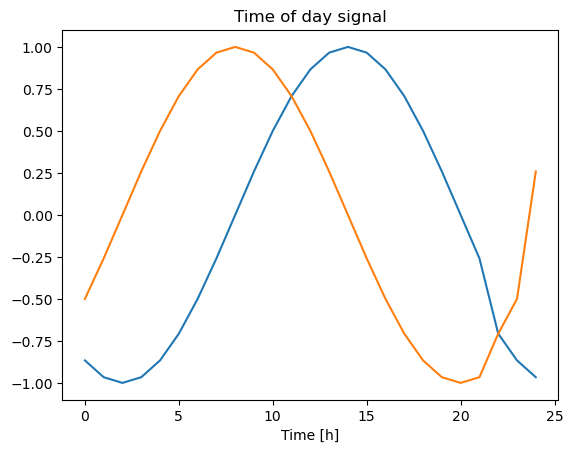

In [47]:
plt.plot(np.array(df_4['Day sin'])[:25])
plt.plot(np.array(df_4['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

This gives the model access to the most important frequency features. In this case you knew ahead of time which frequencies were important.

If you didn't know, you can determine which frequencies are important using an fft. To check our assumptions, here is the tf.signal.rfft of the traffic_volume over time. Note the obvious peaks at frequencies near 1/year and 1/day:

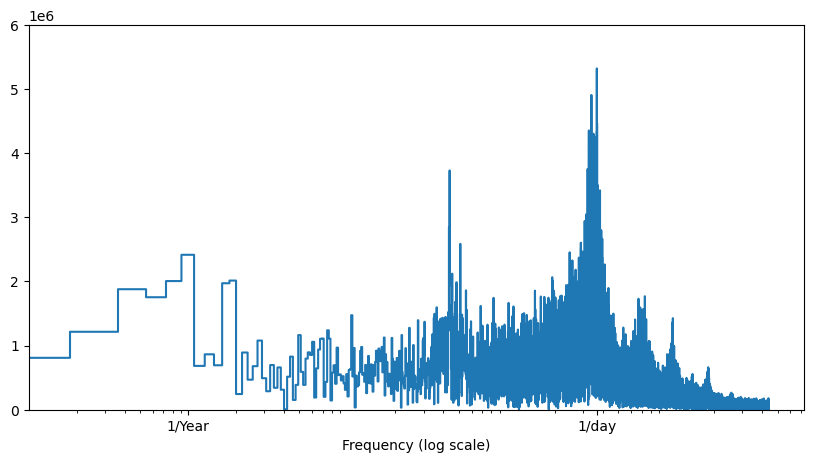

In [48]:
fft = tf.signal.rfft(df_4['traffic_volume'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df_4['traffic_volume'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.figure(figsize=(10, 5))
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 6e6)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

Let's also break down the date_time components into other fields.

In [49]:
df_4['dayofweek'] = df_4.index.dayofweek
df_4['day'] = df_4.index.day
df_4['month'] = df_4.index.month
df_4['year'] = df_4.index.year
df_4['day_hour'] = df_4.index.hour

### Reorder dataframe columns

In [50]:
df_5 = df_4.copy()

Set the traffic_volume to be the first column for ease of use later when we perform predictions

In [51]:
df_5.insert(0, 'traffic_volume', df_5.pop('traffic_volume'))
df_5.insert(1, 'Day sin', df_5.pop('Day sin'))
df_5.insert(2, 'Day cos', df_5.pop('Day cos'))
df_5.insert(3, 'Year sin', df_5.pop('Year sin'))
df_5.insert(4, 'Year cos', df_5.pop('Year cos'))
df_5.insert(5, 'temp', df_5.pop('temp'))
df_5.insert(6, 'clouds_all', df_5.pop('clouds_all'))
df_5.insert(7, 'rain_1h', df_5.pop('rain_1h'))
df_5.insert(8, 'snow_1h', df_5.pop('snow_1h'))
df_5.insert(9, 'is_weekend', df_5.pop('is_weekend'))
df_5.insert(10, 'is_holiday', df_5.pop('is_holiday'))

### Save clean data

In [52]:
df_5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        48204 non-null  int64  
 1   Day sin               48204 non-null  float64
 2   Day cos               48204 non-null  float64
 3   Year sin              48204 non-null  float64
 4   Year cos              48204 non-null  float64
 5   temp                  48204 non-null  float64
 6   clouds_all            48204 non-null  int64  
 7   rain_1h               48204 non-null  float64
 8   snow_1h               48204 non-null  float64
 9   is_weekend            48204 non-null  int64  
 10  is_holiday            48204 non-null  int64  
 11  weather_Clear         48204 non-null  bool   
 12  weather_Clouds        48204 non-null  bool   
 13  weather_Drizzle       48204 non-null  bool   
 14  weather_Fog           48204 non-nul

In [53]:
df_5.to_csv('D:\\traffic prediction\\metro_interstate_clean.zip',
            compression=dict(method='zip', archive_name='metro_interstate_clean.csv'),
            index=True)

### Prepare for timeseries data processing
Load clean data

In [54]:
df_clean = pd.read_csv(r'D:\\traffic prediction\\metro_interstate_clean.zip', parse_dates=['date_time'], index_col='date_time')
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48204 entries, 2012-10-02 09:00:00 to 2018-09-30 23:00:00
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   traffic_volume        48204 non-null  int64  
 1   Day sin               48204 non-null  float64
 2   Day cos               48204 non-null  float64
 3   Year sin              48204 non-null  float64
 4   Year cos              48204 non-null  float64
 5   temp                  48204 non-null  float64
 6   clouds_all            48204 non-null  int64  
 7   rain_1h               48204 non-null  float64
 8   snow_1h               48204 non-null  float64
 9   is_weekend            48204 non-null  int64  
 10  is_holiday            48204 non-null  int64  
 11  weather_Clear         48204 non-null  bool   
 12  weather_Clouds        48204 non-null  bool   
 13  weather_Drizzle       48204 non-null  bool   
 14  weather_Fog           48204 non-nul

In [55]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
traffic_volume,48204.0,3259.818355,1986.860670,0.00,1193.000000,3.380000e+03,4933.000000,7280.00
Day sin,48204.0,0.001335,0.706028,-1.00,-0.707107,2.513964e-13,0.707107,1.00
Day cos,48204.0,-0.015218,0.708034,-1.00,-0.707107,-2.075760e-12,0.707107,1.00
Year sin,48204.0,0.012355,0.697651,-1.00,-0.665718,-6.673194e-03,0.706459,1.00
Year cos,48204.0,-0.031801,0.715640,-1.00,-0.744825,-9.252950e-02,0.706106,1.00
temp,48204.0,281.259375,12.712720,243.39,272.160000,2.824500e+02,291.806000,310.07
clouds_all,48204.0,49.362231,39.015750,0.00,1.000000,6.400000e+01,90.000000,100.00
rain_1h,48204.0,0.130315,1.003368,0.00,0.000000,0.000000e+00,0.000000,55.63
snow_1h,48204.0,0.000222,0.008168,0.00,0.000000,0.000000e+00,0.000000,0.51
is_weekend,48204.0,0.284271,0.451071,0.00,0.000000,0.000000e+00,1.000000,1.00


Let's check for duplicate hourly entries, these are records having the same date_hour, which is not right as per the expectation of hourly samples.

In [56]:
df_clean.index.duplicated().sum()

7629

- There 7629 duplicate hourly entries.
- We should fix this by resampling the data to be on 1 hour basis, so that each record resembles only one hour.
- Duplicate hour records will be averaged within the same hour.



### Split the data

The data will not be randomly shuffled before splitting. This is for two reasons.

1. It ensures that chopping the data into windows of consecutive samples is still possible.  
2. It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.

In [57]:
column_indices = {name: i for i, name in enumerate(df_clean.columns)}
print('Full dataset:\t', df_clean.shape[0])
num_features = df_clean.shape[1]
print('Number of features:', num_features)

Full dataset:	 48204
Number of features: 27


In [58]:
sorted(column_indices.items(), key=lambda x: x[1])

[('traffic_volume', 0),
 ('Day sin', 1),
 ('Day cos', 2),
 ('Year sin', 3),
 ('Year cos', 4),
 ('temp', 5),
 ('clouds_all', 6),
 ('rain_1h', 7),
 ('snow_1h', 8),
 ('is_weekend', 9),
 ('is_holiday', 10),
 ('weather_Clear', 11),
 ('weather_Clouds', 12),
 ('weather_Drizzle', 13),
 ('weather_Fog', 14),
 ('weather_Haze', 15),
 ('weather_Mist', 16),
 ('weather_Rain', 17),
 ('weather_Smoke', 18),
 ('weather_Snow', 19),
 ('weather_Squall', 20),
 ('weather_Thunderstorm', 21),
 ('dayofweek', 22),
 ('day', 23),
 ('month', 24),
 ('year', 25),
 ('day_hour', 26)]

The split distribution without timeseries resampling to 1 hour samples (Has duplicates)

In [59]:
train_df0 = df_clean[:-15000]
print('train_df:\t', train_df0.shape[0])
val_df0 = df_clean[-15000:-5000]
print('val_df:\t\t', val_df0.shape[0])
test_df0 = df_clean[-5000:]
print('test_df:\t', test_df0.shape[0])

train_df:	 33204
val_df:		 10000
test_df:	 5000


In [60]:
train_df = df_clean[:-15000].resample('1H').mean().pad()
print('train_df:\t', train_df.shape[0])
val_df = df_clean[-15000:-5000].resample('1H').mean().pad()
print('val_df:\t\t', val_df.shape[0])
test_df = df_clean[-5000:].resample('1H').mean().pad()
print('test_df:\t', test_df.shape[0])

train_df:	 40110
val_df:		 8359
test_df:	 4083


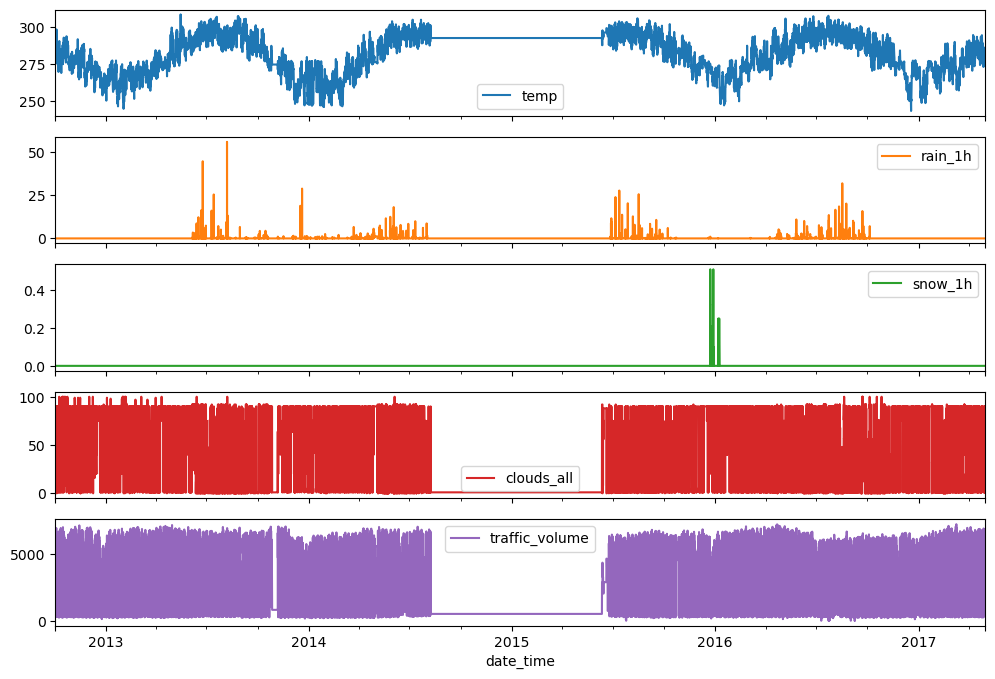

In [61]:
plot_features = train_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

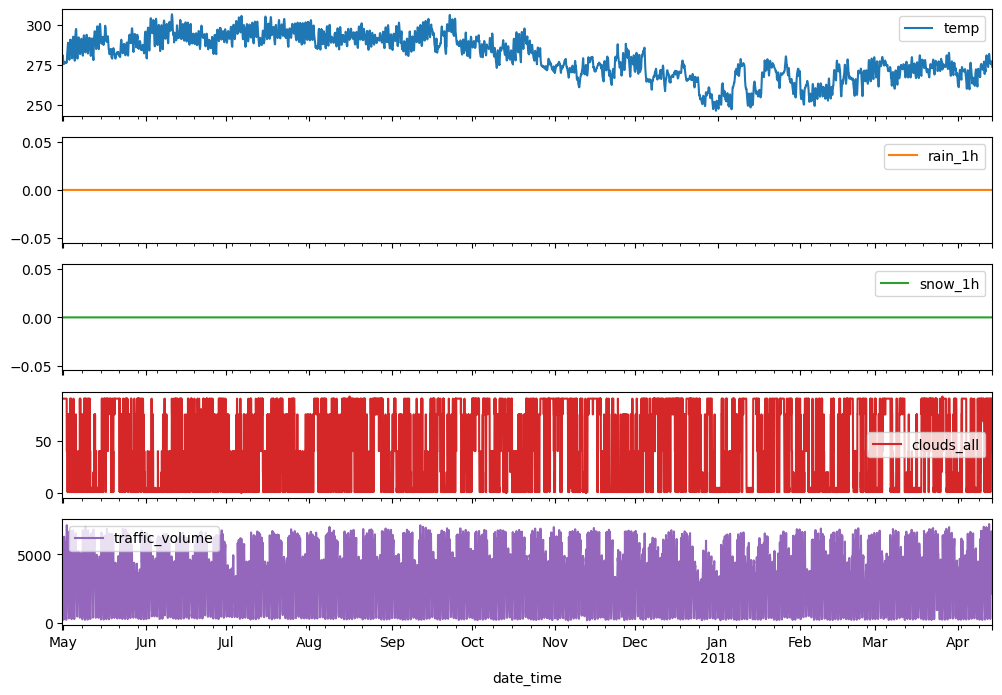

In [62]:
plot_features = val_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

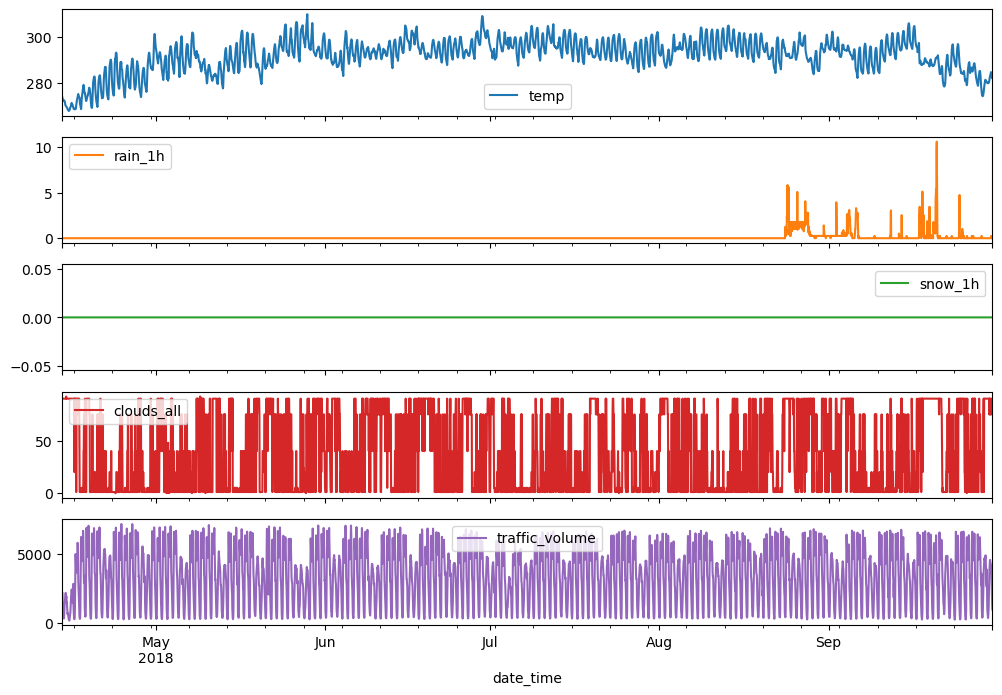

In [63]:
plot_features = test_df[plot_cols]
_ = plot_features.plot(subplots=True, figsize=(12,8))

I notice that that the validation data has no rain or snow data point. Not sure how will this affect the Testing predictions.

### Normalize the data
It is important to scale features before training a neural network. I tested the results using both MinMaxScaler and StandardScaler. I got better results with the MinMaxScaler, So I'll be using scikit-learn MinMaxScaler.  